In [4]:
import pandas as pd

# Load the dataset
file_path = 'filtered_rs_currency_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,name,cuisines,average_cost_for_two,has_online_delivery,url,price_range,currency,has_table_booking,photos_url,thumb,...,rating_text,rating_color,votes,aggregate_rating,latitude,longitude,address,city,locality,locality_verbose
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,1,https://www.zomato.com/HauzKhasSocial?utm_sour...,3,Rs.,1,https://www.zomato.com/HauzKhasSocial/photos?u...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,...,Very Good,5BA829,7931,4.3,28.554285,77.194471,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Hauz Khas Village,"Hauz Khas Village, New Delhi"
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,0,https://www.zomato.com/ncr/qubitos-the-terrace...,3,Rs.,1,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,...,Excellent,3F7E00,778,4.5,28.647133,77.117701,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Rajouri Garden,"Rajouri Garden, New Delhi"
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,2,Rs.,0,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,...,Very Good,5BA829,1537,4.4,28.694947,77.204317,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi"
3,Summer House Cafe,"Italian, Continental",1850,0,https://www.zomato.com/ncr/summer-house-cafe-h...,3,Rs.,1,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,...,Very Good,5BA829,1823,4.1,28.552520,77.203809,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Hauz Khas,"Hauz Khas, New Delhi"
4,38 Barracks,"North Indian, Italian, Asian, American",1600,0,https://www.zomato.com/ncr/38-barracks-connaug...,3,Rs.,1,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,...,Very Good,5BA829,840,4.4,28.633025,77.222858,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Connaught Place,"Connaught Place, New Delhi"


In [5]:
# Define sentiment-based categories based on aggregate_rating
def categorize_sentiment(row):
    if row['aggregate_rating'] >= 4.5:
        return f"Highly Rated: An outstanding dining spot with an exceptional rating of {row['aggregate_rating']}, favored by {row['votes']} food lovers."
    elif 4.0 <= row['aggregate_rating'] < 4.5:
        return f"Well Rated: A popular restaurant with a solid rating of {row['aggregate_rating']}, liked by {row['votes']} customers."
    elif 3.0 <= row['aggregate_rating'] < 4.0:
        return f"Moderately Rated: A decent place with a rating of {row['aggregate_rating']}, appreciated by {row['votes']} diners."
    else:
        return f"Low Rated: A restaurant with room for improvement, holding a rating of {row['aggregate_rating']} from {row['votes']} votes."

# Apply the sentiment-based method to generate descriptions
df['Sentiment Description'] = df.apply(categorize_sentiment, axis=1)

# Select relevant columns to display
sentiment_summary = df[['name', 'aggregate_rating', 'votes', 'Sentiment Description']]

sentiment_summary.head()


,name,aggregate_rating,votes,Sentiment Description
0,Hauz Khas Social,4.3,7931,Well Rated: A popular restaurant with a solid ...
1,Qubitos - The Terrace Cafe,4.5,778,Highly Rated: An outstanding dining spot with ...
2,The Hudson Cafe,4.4,1537,Well Rated: A popular restaurant with a solid ...
3,Summer House Cafe,4.1,1823,Well Rated: A popular restaurant with a solid ...
4,38 Barracks,4.4,840,Well Rated: A popular restaurant with a solid ...


In [6]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

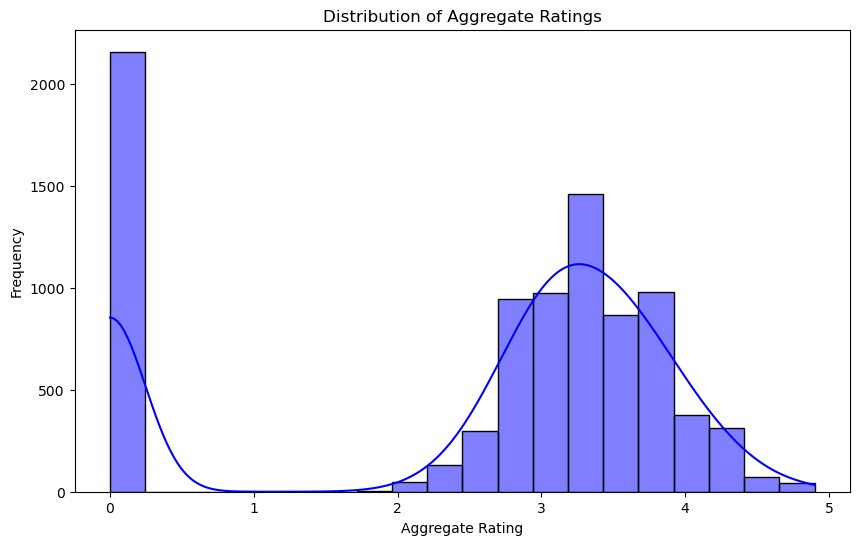

In [7]:
# 1. Distribution of Aggregate Ratings using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], kde=True, bins=20, color='blue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

In [8]:
# 2. Votes vs Aggregate Rating using Plotly (Scatter Plot)
fig1 = px.scatter(df, x='votes', y='aggregate_rating', color='aggregate_rating', 
                  size='votes', title="Votes vs Aggregate Rating",
                  labels={"votes": "Votes", "aggregate_rating": "Aggregate Rating"})
fig1.show()

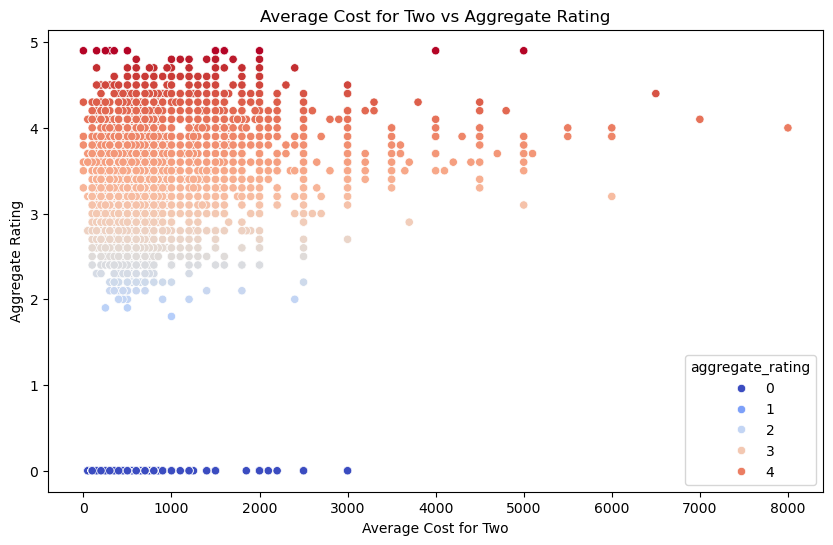

In [9]:
# 3. Average Cost for Two vs Aggregate Rating using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df, hue='aggregate_rating', palette='coolwarm')
plt.title("Average Cost for Two vs Aggregate Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()

In [10]:
# 4. Rating Text Counts using Plotly (Bar Chart)
rating_text_counts = df['rating_text'].value_counts().reset_index()
rating_text_counts.columns = ['Rating Text', 'Count']
fig2 = px.bar(rating_text_counts, x='Rating Text', y='Count', title="Count of Rating Texts",
              labels={"Rating Text": "Rating Text", "Count": "Count of Restaurants"})
fig2.show()

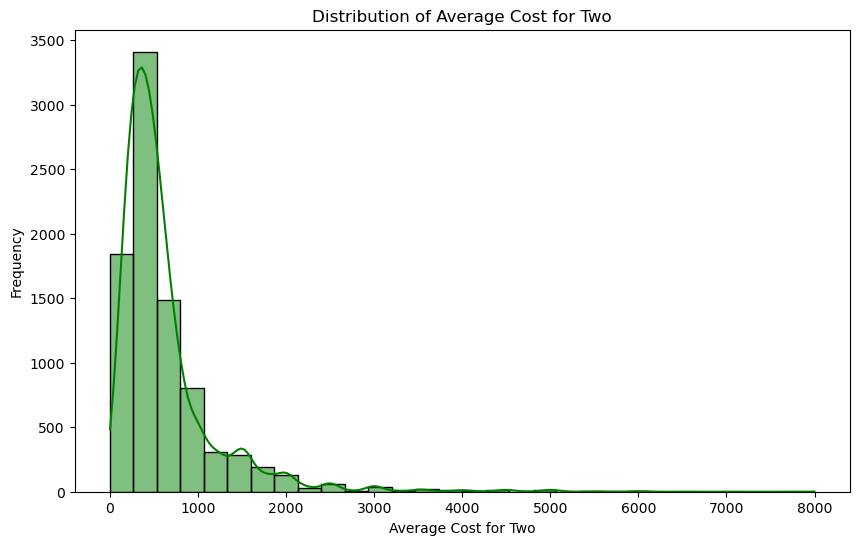

In [11]:
# 5. Distribution of Average Cost for Two using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['average_cost_for_two'], kde=True, bins=30, color='green')
plt.title("Distribution of Average Cost for Two")
plt.xlabel("Average Cost for Two")
plt.ylabel("Frequency")
plt.show()

In [12]:
# 6. Aggregate Rating by Locality using Plotly (Box Plot)
fig3 = px.box(df, x='locality', y='aggregate_rating', title="Aggregate Rating by Locality",
              labels={"locality": "Locality", "aggregate_rating": "Aggregate Rating"},
              points="all")
fig3.show()

In [13]:
# Find the top 10 restaurants by vote count, ordered by the highest votes
top_10_restaurants = df.sort_values(by='votes', ascending=False).head(10)

# Display the relevant details of the top 10 restaurants
top_10_restaurants_summary = top_10_restaurants[['name', 'votes', 'aggregate_rating', 'rating_text']]

top_10_restaurants_summary


,name,votes,aggregate_rating,rating_text
61,Toit,10934,4.8,Excellent
62,Truffles,9667,4.7,Excellent
0,Hauz Khas Social,7931,4.3,Very Good
23,Peter Cat,7574,4.3,Very Good
71,AB's - Absolute Barbecues,6907,4.6,Excellent
24,Barbeque Nation,5966,4.9,Excellent
64,Big Brewsky,5705,4.5,Excellent
107,AB's - Absolute Barbecues,5434,4.9,Excellent
79,The Black Pearl,5385,4.1,Very Good
35,BarBQ,5288,4.2,Very Good


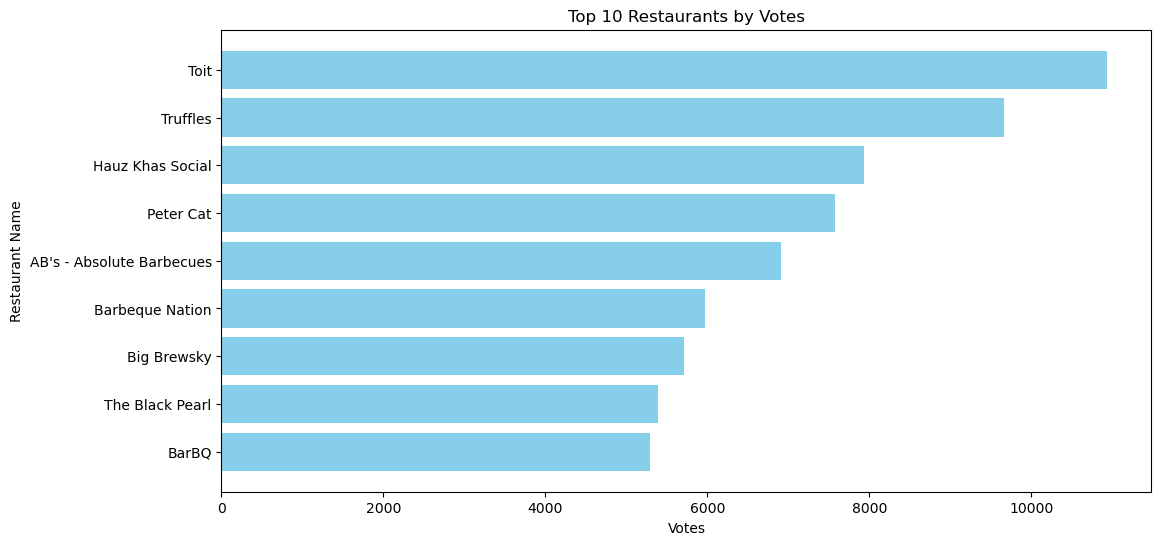

In [14]:
# Plotting using matplotlib to display top 10 restaurants by votes

# Sort and select the top 10 restaurants by votes
top_10_votes_sorted = df.sort_values(by='votes', ascending=False).head(10)

# Create the bar chart for top 10 restaurants by votes
plt.figure(figsize=(12, 6))
plt.barh(top_10_votes_sorted['name'], top_10_votes_sorted['votes'], color='skyblue')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Votes')
plt.gca().invert_yaxis()  # Invert to have the highest on top
plt.show()


In [15]:
# Filter the data for restaurants with votes between 0 and 3
votes_filtered = df[(df['votes'] >= 0) & (df['votes'] <= 3)]

# Group by 'votes' and count how many restaurants fall into each group
votes_count = votes_filtered.groupby('votes')['name'].count().reset_index()
votes_count.columns = ['Votes', 'Restaurant Count']

# Plotting using Plotly for interactive visualization
import plotly.express as px

fig = px.bar(votes_count, x='Votes', y='Restaurant Count', title="Restaurants with Votes Between 0 to 3",
             labels={"Votes": "Votes", "Restaurant Count": "Number of Restaurants"})
fig.show()


In [16]:
# Grouping the data by city and calculating the count of ratings
city_rating_counts = df.groupby('city')['aggregate_rating'].count().reset_index()
city_rating_counts.columns = ['city', 'rating_count']

# Sort to get the top 10 cities with the most ratings
top_10_cities = city_rating_counts.sort_values(by='rating_count', ascending=False).head(10)

# Plotting the top 10 cities by rating count using Plotly
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=top_10_cities['city'], y=top_10_cities['rating_count'], marker_color='indigo')])
fig.update_layout(title="Top 10 Cities with Most Ratings", xaxis_title="City", yaxis_title="Rating Count")
fig.show()


In [17]:
# Now let's identify cities with the most highly rated restaurants (defined as ratings 4.5 and above)
high_rated_cities = df[df['aggregate_rating'] >= 4.5].groupby('city')['aggregate_rating'].count().reset_index()
high_rated_cities.columns = ['city', 'high_rating_count']

# Sort the cities by count of high ratings and get the top 10
top_high_rated_cities = high_rated_cities.sort_values(by='high_rating_count', ascending=False).head(10)

# Plot the top cities with the most highly rated restaurants using Plotly for interactivity
import plotly.express as px

fig = px.bar(top_high_rated_cities, x='city', y='high_rating_count', 
             title='Cities with Most Highly Rated Restaurants (4.5 and Above)',
             labels={'city': 'City', 'high_rating_count': 'Highly Rated Restaurant Count'},
             color='high_rating_count', color_continuous_scale='viridis')

fig.show()


In [18]:
# Now let's identify cities with the most low-rated restaurants (defined as ratings below 3.0)
low_rated_cities = df[df['aggregate_rating'] < 3.0].groupby('city')['aggregate_rating'].count().reset_index()
low_rated_cities.columns = ['city', 'low_rating_count']

# Sort the cities by count of low ratings and get the top 10
top_low_rated_cities = low_rated_cities.sort_values(by='low_rating_count', ascending=False).head(10)

# Plot the top cities with the most low-rated restaurants using Plotly for interactivity
fig = px.bar(top_low_rated_cities, x='city', y='low_rating_count', 
             title='Cities with Most Low-Rated Restaurants (Below 3.0)',
             labels={'city': 'City', 'low_rating_count': 'Low-Rated Restaurant Count'},
             color='low_rating_count', color_continuous_scale='Reds')

fig.show()


In [19]:
# Filter the restaurants with a rating of exactly 4.0
rating_4_restaurants = df[df['aggregate_rating'] == 4.0]

# Group by city and find the top 5 restaurants based on average cost for two
top_5_restaurants = rating_4_restaurants.groupby('city').apply(
    lambda x: x.nlargest(5, 'average_cost_for_two')).reset_index(drop=True)

# Select relevant columns to display
top_5_summary = top_5_restaurants[['name', 'city', 'average_cost_for_two', 'aggregate_rating']]

top_5_summary


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10984\3478063325.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,name,city,average_cost_for_two,aggregate_rating
0,Taj Bano - ITC Mughal,Agra,2500,4.0
1,MoMo Cafe,Agra,2000,4.0
2,Chokho Jeeman Marwari Jain Bhojanalya,Agra,400,4.0
3,Turquoise Villa,Ahmedabad,1200,4.0
4,Cafe Alfresco,Ahmedabad,700,4.0
...,...,...,...,...
72,Coffee Culture - The Ristorante Lounge,Surat,650,4.0
73,Mysore Cafe,Surat,250,4.0
74,Meraki,Vadodara,1200,4.0
75,Mandap - Hotel Express Towers,Vadodara,600,4.0
